In [111]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [112]:
df = pd.read_csv('..\\datos_2\\df_combinado.csv', index_col=0)
df.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.093183,0.774192,-0.694652,0.289304,0.474063,0.943343,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,1.37779,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
1,750.0,0.607192,0.266876,0.017278,0.289304,-0.976053,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
2,590.0,0.607192,-2.391348,3.179149,0.289304,-1.604656,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,-0.763763,2.445320,-0.054153,-3.060006,3.112475,-0.054153
3,684.0,-0.677831,0.774192,-0.411772,-4.156921,-1.604656,-2.456670,-0.054153,-0.054153,-0.206598,-1.953689,-0.154765,2.505314,-0.475191,0.475191,2.474874,-0.72580,-0.763763,-0.408944,-0.054153,0.326797,-0.321288,-0.054153
4,600.0,0.761395,-2.233270,1.652265,0.289304,0.474063,-0.797831,-0.054153,-0.054153,-0.206598,0.511852,-0.154765,-0.399152,-0.475191,0.475191,-0.404061,-0.72580,1.309307,-0.408944,-0.054153,0.326797,-0.321288,-0.054153


In [113]:
x= df.drop(columns='price')
y = df[['price']]

In [114]:
y.describe()

,price
count,342.000000
mean,697.383041
std,53.758634
min,500.000000
25%,670.000000
50%,710.000000
75%,748.500000
max,750.000000


In [115]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [117]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [118]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[724.36346236],
       [700.35695978],
       [739.67136033]])

In [119]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[703.98471487],
       [694.98297318],
       [683.44280938]])

In [120]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [121]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.445023,30.083797,1604.396598,40.054920
test,0.364625,31.073212,1803.124399,42.463212


Text(0, 0.5, 'Predicciones (y_test_pred)')

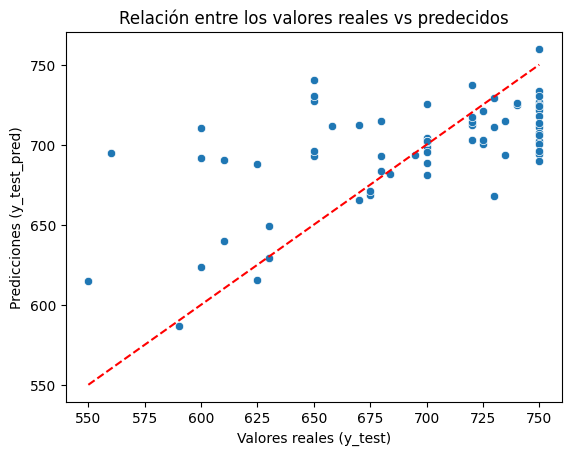

In [122]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

## Decision Tree

In [123]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [124]:
params_arbol_4 = {
    'max_depth': [2,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [6,7, 8]
}

In [125]:
params_arbol_3 = {
    'max_depth': [7,10,14],
    'min_samples_split': [10, 30,40],
    'min_samples_leaf': [7, 10],
    'max_leaf_nodes': [7, 8, 9]
}

In [126]:
params_arbol_2 = {
    'max_depth': [5,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [4,5,6,]
}

In [127]:
params_arbol_5 = {
    'max_depth': [10,30,50],
    'min_samples_split': [100, 200, 500],
    'min_samples_leaf': [50,60,81],
    'max_leaf_nodes': [10,20,50]
}

In [128]:
params_arbol_10 = {
    'max_depth': [2,4,7],
    'min_samples_split': [10,20,25],
    'min_samples_leaf': [10, 15,20,25],
    'max_leaf_nodes': [2,4,6,8]
}

## Params 1

In [129]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'max_leaf_nodes': [6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [130]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [131]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=10,
                      min_samples_split=10)

In [132]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [133]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [134]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.448592,31.060977,1594.079034,39.925919
test,0.227783,35.431761,2191.466214,46.813099


# Params 3

In [135]:
grid_search_arbol_3 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_3,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [10, 30, 40]},
             scoring='neg_mean_squared_error')

In [136]:
modelo_final_arbol_3 = grid_search_arbol_3.best_estimator_

In [137]:
y_test_pred_final_3 = modelo_final_arbol_3.predict(x_test)
y_train_pred_final_3 = modelo_final_arbol_3.predict(x_train)

In [138]:
df_metricas_arbol_3 = metricas(y_train, y_train_pred_final_3, y_test, y_test_pred_final_3)

In [139]:
df_metricas_arbol_3

,r2_score,MAE,MSE,RMSE
train,0.466533,30.234593,1542.212517,39.271014
test,0.201207,35.647993,2266.885491,47.611821


## PARAMS 2

In [140]:
grid_search_arbol_2 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_2,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 4, 3], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [18, 20, 21],
                         'min_samples_split': [50, 100, 110]},
             scoring='neg_mean_squared_error')

In [141]:
modelo_final_arbol_2 = grid_search_arbol_2.best_estimator_

In [142]:
modelo_final_arbol_2

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5, min_samples_leaf=21,
                      min_samples_split=100)

In [143]:
y_test_pred_final_2 = modelo_final_arbol_2.predict(x_test)
y_train_pred_final_2 = modelo_final_arbol_2.predict(x_train)

In [144]:
df_metricas_arbol_2 = metricas(y_train, y_train_pred_final_2, y_test, y_test_pred_final_2)

In [145]:
df_metricas_arbol_2

,r2_score,MAE,MSE,RMSE
train,0.350265,33.118596,1878.334439,43.339756
test,0.218987,35.607796,2216.428577,47.078961


# Params 5

In [146]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [50, 60, 81],
                         'min_samples_split': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [147]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [148]:
modelo_final_arbol_5

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=50,
                      min_samples_split=200)

In [149]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [150]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [151]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.271002,35.249686,2107.478290,45.907279
test,0.307844,34.201811,1964.259982,44.319973


# PARAMS 10

In [152]:
grid_search_arbol_10 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_10,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_10.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 7], 'max_leaf_nodes': [2, 4, 6, 8],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [10, 20, 25]},
             scoring='neg_mean_squared_error')

In [153]:
modelo_final_arbol_10 = grid_search_arbol_10.best_estimator_

In [154]:
modelo_final_arbol_10

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=10,
                      min_samples_split=10)

In [155]:
y_test_pred_final_10 = modelo_final_arbol_10.predict(x_test)
y_train_pred_final_10 = modelo_final_arbol_10.predict(x_train)

In [156]:
df_metricas_arbol_10 = metricas(y_train, y_train_pred_final_10, y_test, y_test_pred_final_10)

In [157]:
df_metricas_arbol_10

,r2_score,MAE,MSE,RMSE
train,0.448592,31.060977,1594.079034,39.925919
test,0.227783,35.431761,2191.466214,46.813099


## Opciones de visualización para mejorar

In [158]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_5.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
55,0.003923,0.001339,0.003018,0.000445,50,10,50,200,"{'max_depth': 50, 'max_leaf_nodes': 10, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
1,0.004146,0.000479,0.003223,0.000435,10,10,50,200,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
19,0.003710,0.000392,0.003217,0.000512,10,50,50,200,"{'max_depth': 10, 'max_leaf_nodes': 50, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
73,0.004718,0.002924,0.003010,0.000545,50,50,50,200,"{'max_depth': 50, 'max_leaf_nodes': 50, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
64,0.004430,0.001321,0.003218,0.000947,50,20,50,200,"{'max_depth': 50, 'max_leaf_nodes': 20, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
37,0.003317,0.000681,0.003112,0.000221,30,20,50,200,"{'max_depth': 30, 'max_leaf_nodes': 20, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
46,0.003315,0.000258,0.002836,0.000554,30,50,50,200,"{'max_depth': 30, 'max_leaf_nodes': 50, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
10,0.003515,0.000437,0.003217,0.000828,10,20,50,200,"{'max_depth': 10, 'max_leaf_nodes': 20, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
28,0.004526,0.001782,0.004543,0.001564,30,10,50,200,"{'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...",-1733.741162,-2195.061964,-3318.507285,-1868.430064,-2745.044498,-2372.156995,587.758829,1
18,0.005822,0.002167,0.003118,0.000662,10,50,50,100,"{'max_depth': 10, 'max_leaf_nodes': 50, 'min_s...",-1768.081472,-2120.737924,-3366.113123,-1820.580702,-2894.505708,-2394.003786,630.993779,10


In [159]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
55,50,10,50,200,-2372.156995
1,10,10,50,200,-2372.156995
19,10,50,50,200,-2372.156995
73,50,50,50,200,-2372.156995
64,50,20,50,200,-2372.156995
...,...,...,...,...,...
50,30,50,60,500,-2901.337759
44,30,20,81,500,-2901.337759
47,30,50,50,500,-2901.337759
65,50,20,50,500,-2901.337759


In [160]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [161]:
df_rmse_prof

,param_max_depth,MSE
0,10,51.372293
1,30,51.372293
2,50,51.372293


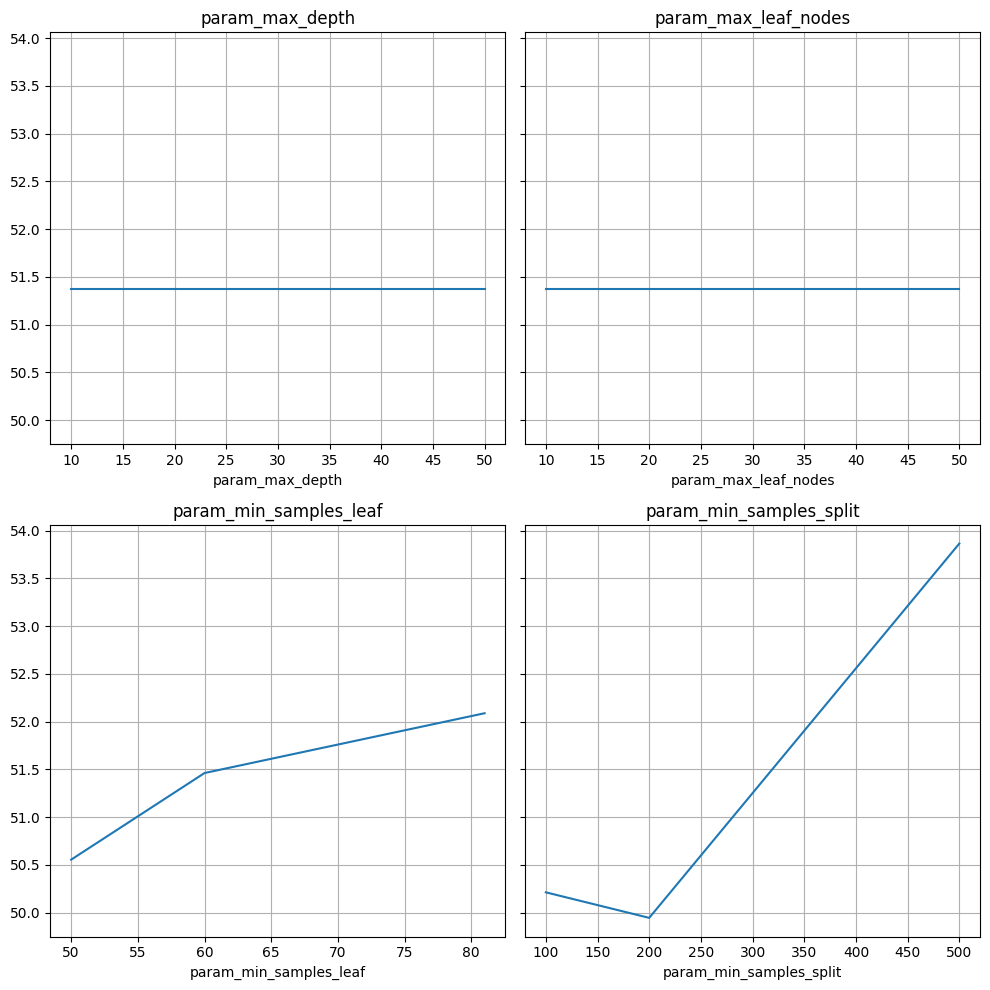

In [162]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [163]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

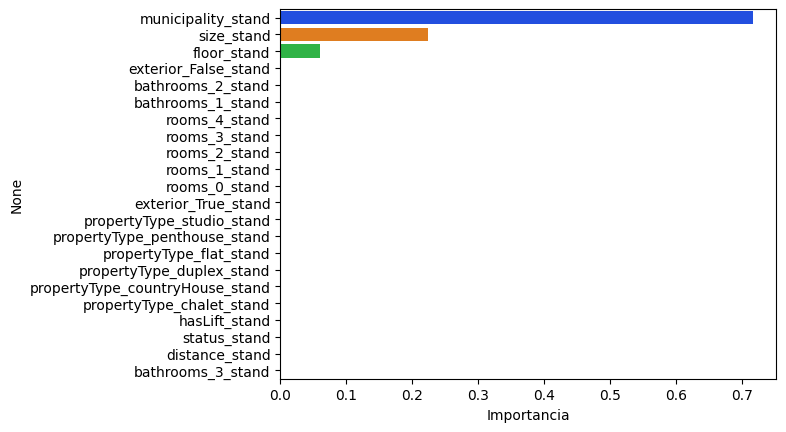

In [164]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Random Forest

In [166]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [10],
    'min_samples_split': [9,15,35],
    'min_samples_leaf': [40,60,80,100,200], 
    # 'max_leaf_nodes': [55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [167]:
modelo_final_rrf

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=60,
                      min_samples_split=9, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [168]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.112797,39.944531,2564.837999,50.644230
test,0.098847,40.742670,2557.370713,50.570453


In [169]:
params_rf = {
    'n_estimators': [35,50,75,115,110,120,150],
    'max_features': [3,5,7,10,15,18,20],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [50,60,65],
    'min_samples_leaf': [19,21], 
    'max_leaf_nodes': [2,4,6]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [170]:
modelo_final_rf

RandomForestRegressor(max_depth=5, max_features=15, max_leaf_nodes=6,
                      min_samples_leaf=19, min_samples_split=50,
                      n_estimators=35, random_state=42)

In [171]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.390562,32.237782,1761.840765,41.974287
test,0.294654,34.540867,2001.693618,44.740291


# Gradient Booster

In [172]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [173]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=100,
                          n_estimators=115, random_state=42)

In [174]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.596710,25.775443,1165.881861,34.145012
test,0.336267,33.678765,1883.600773,43.400470


# XGB

In [175]:
from xgboost import XGBRegressor

In [176]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [177]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [178]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.585481,26.913130,1198.343531,34.617099
test,0.312562,33.077156,1950.872221,44.168679
